<a href="https://colab.research.google.com/github/hannamakarova/Andvanced-Analytics-Prediction-Models/blob/main/Estimation_of_the_Average_Customer_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple linear regression

An online store owner wants to understand what factors affect the average customer check (target variable). To do this, you can build a multivariate linear regression model that predicts the average customer check based on several explanatory variables.

Data description:

Target variable ( y ): Average customer check (UAH).

Explanatory variables:

x1 : Number of items in the cart.
x2 : Average unit price of the item (UAH).
x3 : Percentage of discount applied to the order (%).
x4 : Time spent on the site before placing the order (minutes).

In [ ]:
import pandas as pd

# x1: Number of items in the cart (Items_in_Cart)
num_items = [4, 8, 3, 7, 2, 6, 1, 5, 9, 2, 8, 4, 7, 3, 6, 2, 5, 9, 1, 4,
             7, 6, 3, 8, 2, 5, 4, 9, 7, 2, 6, 3, 8, 5, 1, 7, 9, 4, 6, 2]

# x2: Average price per item in the cart (in UAH) (Average_Item_Price)
avg_price = [150.8, 230.5, 175.2, 310.1, 200.0, 320.4, 120.5, 270.6, 450.2, 210.7,
             180.5, 350.1, 290.3, 410.5, 250.8, 280.7, 300.5, 490.1, 130.2, 260.5,
             340.8, 220.1, 170.5, 310.3, 180.6, 260.4, 300.9, 420.7, 290.5, 200.1,
             310.6, 150.5, 370.2, 280.5, 180.1, 400.7, 430.6, 270.5, 320.2, 150.6]

# x3: Discount percentage applied to the order (Discount_Percentage)
discount = [5.0, 10.5, 15.0, 8.5, 12.0, 20.0, 7.0, 14.0, 25.0, 6.5,
            9.0, 11.5, 22.0, 18.0, 10.0, 5.5, 16.0, 24.0, 13.0, 8.0,
            15.5, 17.0, 9.5, 19.0, 21.0, 7.5, 14.5, 25.0, 11.0, 10.0,
            20.5, 6.0, 13.5, 18.5, 8.5, 22.5, 24.5, 12.5, 14.0, 10.5]

# x4: Time spent on the website before placing the order (in minutes) (Time_on_Site)
time_spent = [25.0, 35.5, 28.0, 40.5, 22.0, 50.0, 18.5, 33.0, 48.5, 30.0,
              27.5, 38.0, 44.5, 39.0, 31.5, 29.0, 34.5, 49.0, 24.0, 32.0,
              37.5, 41.0, 26.0, 42.5, 23.5, 36.0, 30.5, 47.0, 29.5, 34.0,
              40.0, 28.5, 39.5, 43.0, 25.5, 45.5, 46.5, 30.0, 33.5, 27.0]

# y: Average order value (in UAH) (Average_Check)
avg_order = [950, 1780, 1120, 2250, 870, 2000, 650, 1600, 3200, 1050,
             1250, 2500, 2100, 2800, 1800, 1650, 1900, 3400, 750, 1550,
             2300, 1850, 1150, 2400, 890, 1700, 1950, 3100, 2200, 1450,
             2000, 950, 2500, 1750, 1250, 2850, 3300, 1550, 2100, 950]

data = pd.DataFrame({'avg_order': avg_order,
                     'num_items': num_items,
                     'avg_price': avg_price,
                     'discount': discount,
                     'time_spent': time_spent
                     })

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data[["num_items", "avg_price", "discount", "time_spent"]]
y = data["avg_order"]
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)
# training model
model = LinearRegression()
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

# model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)


# get w_0
print("w_0:", model.intercept_)

# get coefficients
print("coefficients:", model.coef_)





In [ ]:
feature_importance = model.coef_

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar( range(len(feature_importance)),feature_importance,
        tick_label=["num_items", "avg_price", "discount", "time_spent"])
plt.title("Feature Importance in Linear Regression Model")
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.show()

**Model Performance Metrics**

MAE (Mean Absolute Error) (172.39 uan):
* On average, model’s predictions are off by about 172 uan. This is the typical size of the prediction error.

MSE (Mean Squared Error) (40,008.71 uan²):
* Indicates some large individual errors exist (because of squaring). Possibly some customers have unusual spending behavior.

R² (R-squared) (0.899):
* About 89.9% of the variation in customer check size is explained by the four variables above.
That’s very good — your model captures almost all relevant patterns.

Model Summary (Context: Online Store)
💡 Regression Equation:
𝑦
^
=
−
227.66
+
48.27
𝑥
1
+
6.98
𝑥
2
−
2.31
𝑥
3
−
1.88
𝑥
4
y
^
​
 =−227.66+48.27x
1
​
 +6.98x
2
​
 −2.31x
3
​
 −1.88x
4
​

Where:

𝑦
y — Predicted average check (грн)

𝑥
1
x
1
​
  — Number of items in cart

𝑥
2
x
2
​
  — Average price per item (грн)

𝑥
3
x
3
​
  — Discount percentage (%)

𝑥
4
x
4
​
  — Time spent on website before purchase (minutes)
  

![image.png](
  
)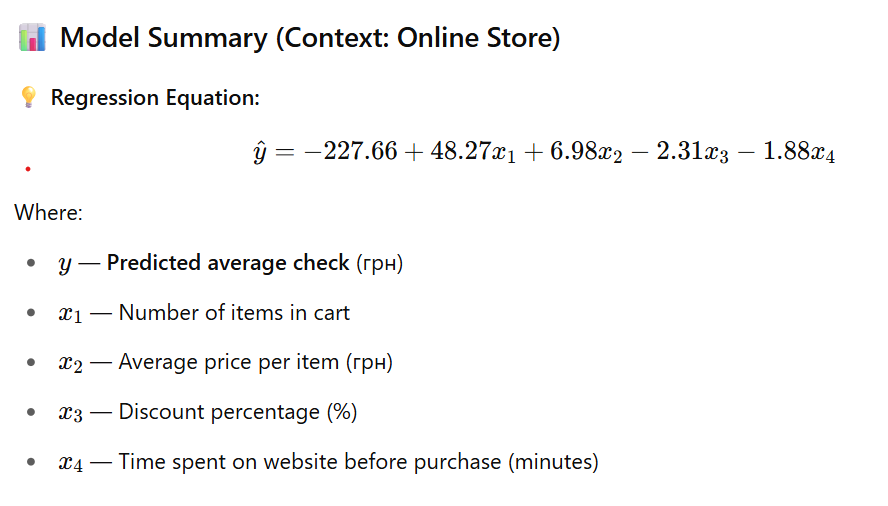

 * Intercept (w_0): -227.66
 If all input features are 0, the model predicts -227.66 as the output.

* x₁: 48.27 (Number of items)
Each additional item in the cart increases the average check by ~48.27 грн (on average), holding everything else constant.

This makes sense: more items → higher total.

* x₂: 6.98 (Average item price)
If the average price of items in the cart increases by 1 грн, the total check increases by about 6.98 грн.

More expensive items → higher bill.

* x₃: -2.31 (Discount %)
For each 1% increase in discount, the average check drops by ~2.31 грн.

Discounts reduce total bill — this aligns with real business effects.

* x₄: -1.88 (Time on site)
For every extra minute a customer spends on the site before ordering, the average check drops by ~1.88 грн.

This is interesting — possibly longer browsing may indicate more price sensitivity or indecision?

In [ ]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


Each value is the R² score from one fold of cross-validation:

It shows how much variance in the average check your model explains on that particular subset.

The scores are all quite high (close to 1), meaning your model performs consistently well across different data splits.

This is the average R² score across all 5 folds.

It means that on average, your model explains 93.13% of the variability in the average check, even when tested on new data subsets.

This confirms that your model is stable and reliable, not just lucky on one dataset slice.

# Multicollinearity, refitting, and regularization in linear models

Для попередньої моделі оцінки середнього чеку клієнта:

Виведи кореляційну матрицю пояснюючих змінних. Чи є у нас ознаки мультиколінеарності?

Побудуй регуляризовані моделі лінійної регресії Ridge та Lasso із гіперпараметрами за замовчуванням. Оціни якість цих моделей за допомогою метрик MAE, R2. Чи покращились результати базової моделі?

Підбери оптимальний гіперпараметр alpha моделі Ridge, використавши масив значень [0.001, 0.01, 0.1, 1, 10, 100, 1000]. Побудуй валідаційну криву. Побудуй модель з оптимальним значенням alpha та оціни її якість.

Підбери оптимальний гіперпараметр alpha моделі Lasso, використавши масив значень [0.001, 0.01, 0.1, 1, 10, 100, 1000]. Побудуй валідаційну криву. Побудуй модель з оптимальним значенням alpha та оціни її якість.

Проаналізуй коефіцієнти моделі Lasso. Чи є у моделі неважливі змінні?


For the previous model of estimating the average customer check:

Deduce the correlation matrix of the explanatory variables. Do we have signs of multicollinearity?

Construct regularized linear regression models Ridge and Lasso with default hyperparameters. Evaluate the quality of these models using the MAE, R2 metrics. Have the results of the base model improved?

Choose the optimal hyperparameter alpha of the Ridge model using the array of values ​​[0.001, 0.01, 0.1, 1, 10, 100, 1000]. Construct a validation curve. Construct a model with the optimal alpha value and evaluate its quality.

Choose the optimal hyperparameter alpha of the Lasso model using the array of values ​​[0.001, 0.01, 0.1, 1, 10, 100, 1000]. Construct a validation curve. Build a model with the optimal alpha value and evaluate its quality.

Analyze the coefficients of the Lasso model. Are there any unimportant variables in the model?

In [ ]:
X.corr()

Multicollinearity occurs when independent variables are highly correlated with each other. A common rule of thumb: correlation coefficients greater than 0.8 or less than -0.8 may indicate multicollinearity.

From results we can see that some variables are highly correlated:
avg_price and time_spent = 0.836 → High correlation → potential

All other pairs are below 0.8 → No strong multicollinearity

Potential multicollinearity  (>0.7):

num_items	and avg_price

num_items	and time_spend

multicollinearity

discount and time_spend

If you're building a model like linear regression, this could make the coefficients unstable or misleading.



In [ ]:
from sklearn.linear_model import Ridge, Lasso


# evaluate basic model
y_pred_linreg = lin_reg.predict(X_test)
print("MSE (Linear model without regularization):", mean_squared_error(y_test, y_pred_linreg))
print("R2 (Linear model without regularization):", r2_score(y_test, y_pred_linreg))

# train Ridge model
ridge = Ridge()
ridge.fit(X_train, y_train)

# evaluate Ridge model
y_pred_ridge = ridge.predict(X_test)
print("MSE (Ridge model):", mean_squared_error(y_test, y_pred_ridge))
print("R2 (Ridge model):", r2_score(y_test, y_pred_ridge))

# train Lasso model
lasso = Lasso()
lasso.fit(X_train, y_train)

# evaluate Lasso model
y_pred_lasso = lasso.predict(X_test)
print("MSE (Lasso model):", mean_squared_error(y_test, y_pred_lasso))
print("R2 (Lasso model):", r2_score(y_test, y_pred_lasso))



In [ ]:
# hyperparameter tuning in Lasso model
possible_alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
r2_scores = []
for alpha in possible_alpha:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  y_pred_lasso = lasso.predict(X_test)
  r2_scores.append(r2_score(y_test, y_pred_lasso))

# plot validation curve
plt.plot(possible_alpha, r2_scores, marker="o")
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.title("Validation curve for Lasso model")
plt.show()


In [ ]:
# hyperparameter tuning in Ridge model
possible_alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
r2_scores = []
for alpha in possible_alpha:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  y_pred_ridge = ridge.predict(X_test)
  r2_scores.append(r2_score(y_test, y_pred_ridge))

# plot validation curve
plt.plot(possible_alpha, r2_scores, marker="o")
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.title("Validation curve for Ridge model")
plt.show()


In [21]:
# train optimal Lasso model
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

# evaluate optimal Lasso model
y_pred_lasso = lasso.predict(X_test)
print("MSE (Lasso model):", mean_squared_error(y_test, y_pred_lasso))
print("R2 (Lasso model):", r2_score(y_test, y_pred_lasso))
print("Lasso coefficients:", lasso.coef_)


MSE (Lasso model): 39868.880597082534
R2 (Lasso model): 0.8996060426437307
Lasso coefficients: [47.87486623  6.97865751 -2.27668216 -1.7402076 ]


In [ ]:
# train optimal Ridge model
ridge = Ridge(alpha=200)
ridge.fit(X_train, y_train)

# evaluate optimal Ridge model
y_pred_ridge = ridge.predict(X_test)
print("MSE (Ridge model):", mean_squared_error(y_test, y_pred_ridge))
print("R2 (Ridge model):", r2_score(y_test, y_pred_ridge))



All three models perform similarly, but regularized models (Ridge & Lasso) slightly outperform the plain Linear Regression. Lasso shows the best performance, with the lowest MSE and highest R².

This suggests that:

The relationships are mostly linear.

There's not much overfitting in the base model.

The features have decent predictive power.